In [7]:
%run ../../utils/commonImports.py
%matplotlib inline

# Load Data

In [8]:
X_train, y_train, X_val, y_val, X_test, y_test = load_split('D:\\Dropbox\\My work\\krypl-project\\dataSplit\\03-candle-shape-sg')

# Test Train Validation Split

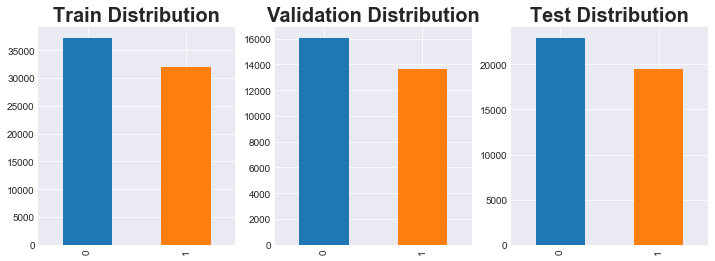

In [9]:
fig, axes = plt.subplots(1, 3, figsize=[12, 4])
y_train.value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Train Distribution', fontproperties=title_font)
y_val.value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Validation Distribution', fontproperties=title_font)
y_test.value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Test Distribution', fontproperties=title_font);

In [10]:
X_train.describe()

,close_high_ratio_zscore288,open_high_ratio_zscore288,low_high_ratio_zscore288,open_close_ratio_zscore288,close_high_ratio_zscore288_lag_1,close_high_ratio_zscore288_lag_2,close_high_ratio_zscore288_lag_3,close_high_ratio_zscore288_lag_4,close_high_ratio_zscore288_lag_5,close_high_ratio_zscore288_lag_6,...,low_high_ratio_zscore288_lag_9,open_close_ratio_zscore288_lag_1,open_close_ratio_zscore288_lag_2,open_close_ratio_zscore288_lag_3,open_close_ratio_zscore288_lag_4,open_close_ratio_zscore288_lag_5,open_close_ratio_zscore288_lag_6,open_close_ratio_zscore288_lag_7,open_close_ratio_zscore288_lag_8,open_close_ratio_zscore288_lag_9
count,"69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000",...,"69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000","69,289.0000"
mean,-0.0101,-0.0135,-0.0087,0.0019,-0.0116,-0.0120,-0.0121,-0.0143,-0.0152,-0.0152,...,-0.0111,0.0042,0.0037,0.0031,0.0057,0.0082,0.0086,0.0053,0.0037,0.0016
std,1.0837,1.0847,1.1119,1.0615,1.0889,1.0915,1.0964,1.0927,1.0998,1.0987,...,1.1152,1.0518,1.0575,1.0611,1.0583,1.0549,1.0583,1.0590,1.0593,1.0497
min,-19.6700,-18.6141,-15.5778,-17.7256,-27.7103,-27.7103,-27.7103,-17.4661,-27.7103,-27.7103,...,-15.0442,-11.0323,-17.7256,-17.7256,-17.7256,-8.6524,-17.7256,-17.7256,-17.7256,-10.1597
25%,-0.4931,-0.4990,-0.4831,-0.5701,-0.4968,-0.4961,-0.4961,-0.4897,-0.4945,-0.4907,...,-0.4905,-0.5720,-0.5750,-0.5763,-0.5703,-0.5655,-0.5654,-0.5699,-0.5712,-0.5739
50%,0.2092,0.1939,0.1971,-0.0158,0.2083,0.2064,0.2062,0.2027,0.2061,0.2061,...,0.1989,-0.0118,-0.0132,-0.0128,-0.0109,-0.0086,-0.0093,-0.0074,-0.0125,-0.0133
75%,0.6937,0.6904,0.7011,0.5595,0.6939,0.6936,0.6960,0.6911,0.6922,0.6913,...,0.7007,0.5607,0.5576,0.5597,0.5605,0.5588,0.5593,0.5619,0.5615,0.5582
max,3.7825,3.4200,3.2700,20.9074,3.2127,3.7825,3.7825,3.3486,3.7825,3.7825,...,3.0523,14.7571,15.7067,20.9074,15.7067,15.8543,15.8543,20.9074,15.8543,15.8543


# Decision Tree

In [11]:
import time
from modeling.gridsearch import GridSearch
from sklearn.tree import DecisionTreeClassifier

params_to_train = {
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [10, 30, 50],
    'class_weight': [{0: i, 1:1}  for i in range(1, 6)]
}

grid_search = GridSearch(DecisionTreeClassifier, params_to_train)
grid_search.fit_all(X_train, y_train)

path = "D:\\Dropbox\\My work\\krypl-project\\models\\03-candle-shape-sg"
save_model(grid_search, f'{path}\\tree_search.pkl');

train [0/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 1, 1: 1}}........................... 1.64 sec
train [1/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 2, 1: 1}}........................... 1.58 sec
train [2/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 3, 1: 1}}........................... 1.61 sec
train [3/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 4, 1: 1}}........................... 1.61 sec
train [4/60] {'max_depth': 5, 'min_samples_split': 10, 'class_weight': {0: 5, 1: 1}}........................... 1.64 sec
train [5/60] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': {0: 1, 1: 1}}........................... 1.62 sec
train [6/60] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': {0: 2, 1: 1}}........................... 1.60 sec
train [7/60] {'max_depth': 5, 'min_samples_split': 30, 'class_weight': {0: 3, 1: 1}}........................... 1.58 sec
train [8/60] {'max_depth': 5, 'm